# Classifiers
In this lab session we will use the library scikit-learn to apply the following classifier algorithms:
1. Support Vector Machines (SVM)
2. K-Nearest Neighbor
3. Naive Bayes
4. Decision Trees

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets
import seaborn as sns
import graphviz

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Question 1
Load the iris data from scikit learn, the data contains information about the Iris plant, there are three types: Setosa, Versicolor, and Virginica. <br>
the data contains four features: sepal length, sepal width, petal length, and petal width all in centimeters.

In [3]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(f'Iris types : {iris.target_names}')
print(f'Features : {iris.feature_names}')

Iris types : ['setosa' 'versicolor' 'virginica']
Features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Question 2
Make a plot to visualize the data.

<IPython.core.display.Javascript object>


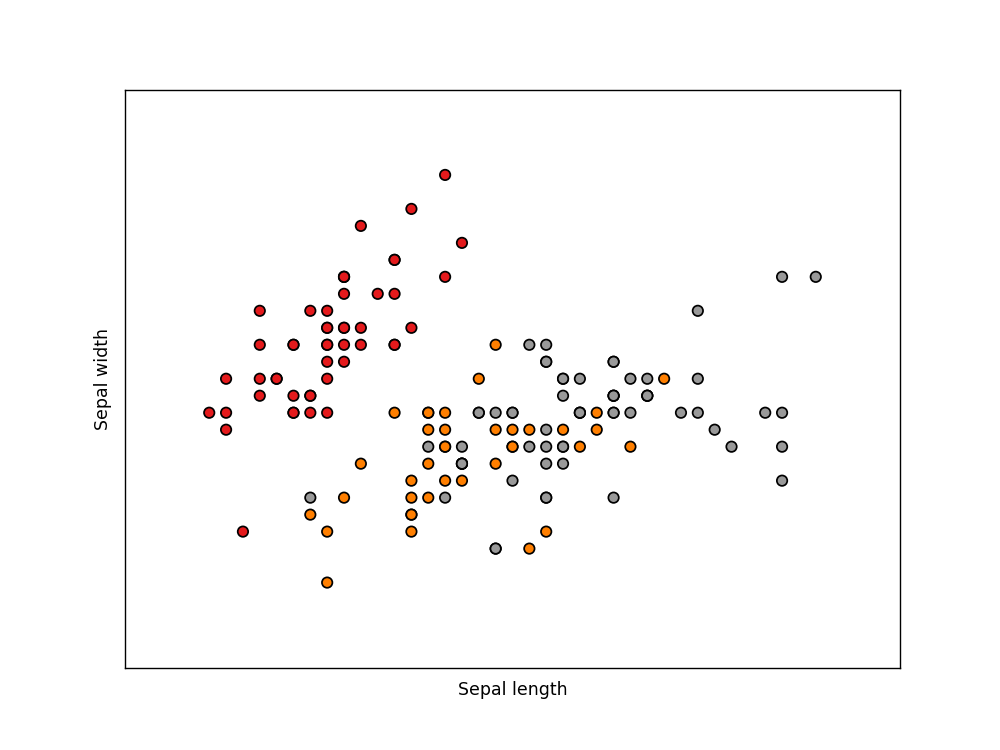

<IPython.core.display.Javascript object>


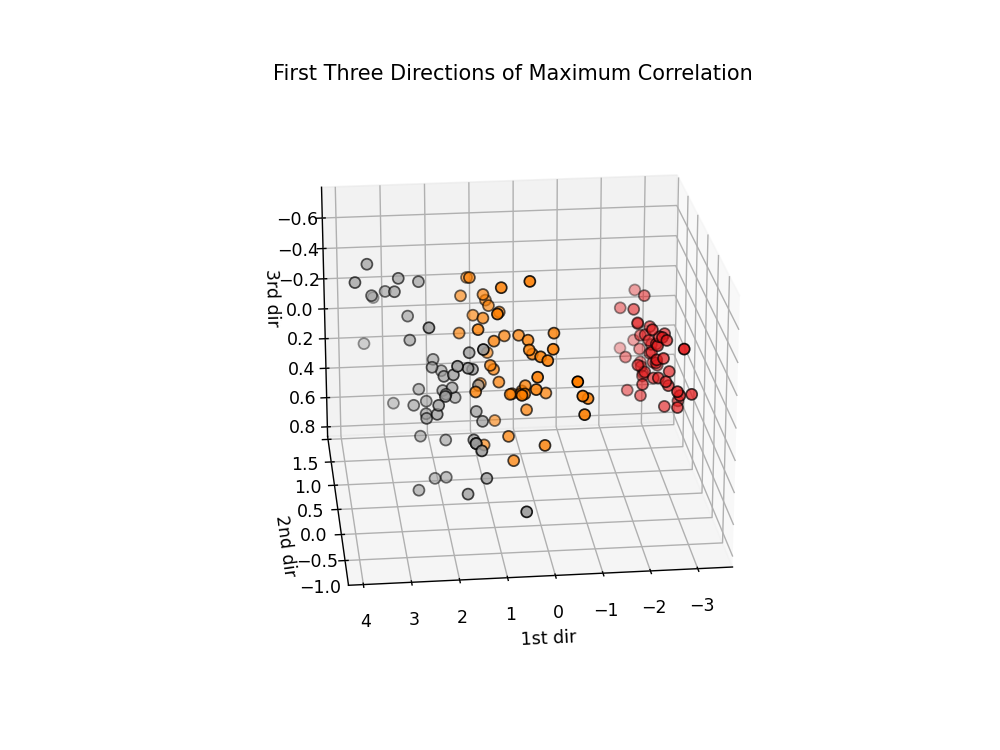

Text(0.5, 0, '3rd dir')

In [30]:
X = iris_X[:, :2]  # we only take the first two features.
y = iris_y

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First Three Directions of Maximum Correlation")
ax.set_xlabel("1st dir")
ax.set_ylabel("2nd dir")
ax.set_zlabel("3rd dir")

### Test/Train Split

### Question 3
Perform a Test/Train split by leaving 10 data samples for testing.

In [5]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

### Support Vector Machines (SVM)

### Question 4
Use sklearn to fit an SVM model, use the first two feature vectors only and plot the decision boundaries. <br>
Change the kernel to check how that affects the decision boundary.

In [6]:
from sklearn import svm
kernel = 'linear'
svc1 = svm.SVC(kernel=kernel)
svc1.fit(iris_X_train[:, :2], iris_y_train)

SVC(kernel='linear')

In [22]:
%matplotlib inline

In [31]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundaries(clf, iris_X_train, iris_y_train):                                                                      
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ["darkblue", "c", "darkorange"]

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        iris_X_train[:, :2],
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points

    sns.scatterplot(
        x=iris_X_train[:, 0],
        y=iris_X_train[:, 1],
        hue=iris.target_names[iris_y_train],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

<IPython.core.display.Javascript object>


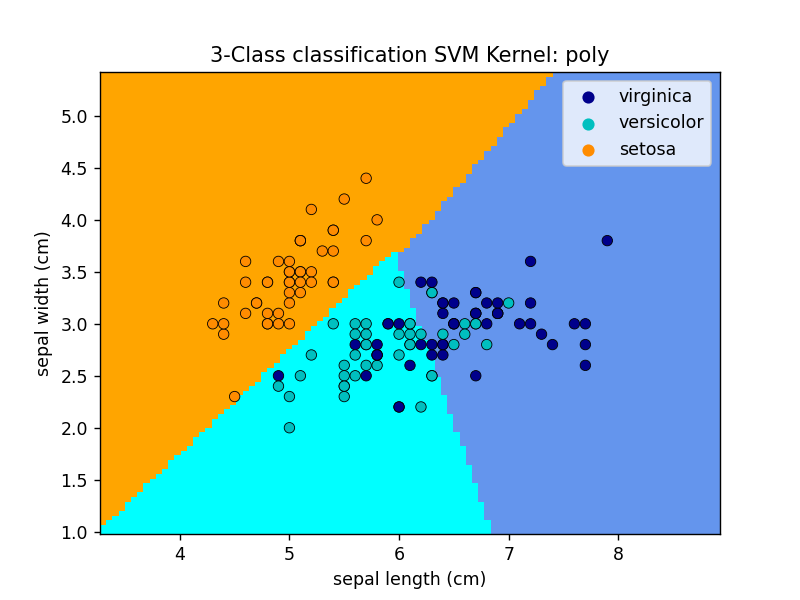

Text(0.5, 1.0, '3-Class classification SVM Kernel: poly')

In [47]:
plot_decision_boundaries(svc1, iris_X_train, iris_y_train)
plt.title("3-Class classification SVM Kernel: " + kernel )

### Question 5
Use the trained model to predict the labels of the testing set, and evaluate the prediction.

In [33]:
print(f'Predicted array: {svc1.predict(iris_X_test[:, :2])}')
print(f'Test array: {iris_y_test}')

Predicted array: [1 1 1 0 0 0 2 1 2 0]
Test array: [1 1 1 0 0 0 2 1 2 0]


<IPython.core.display.Javascript object>


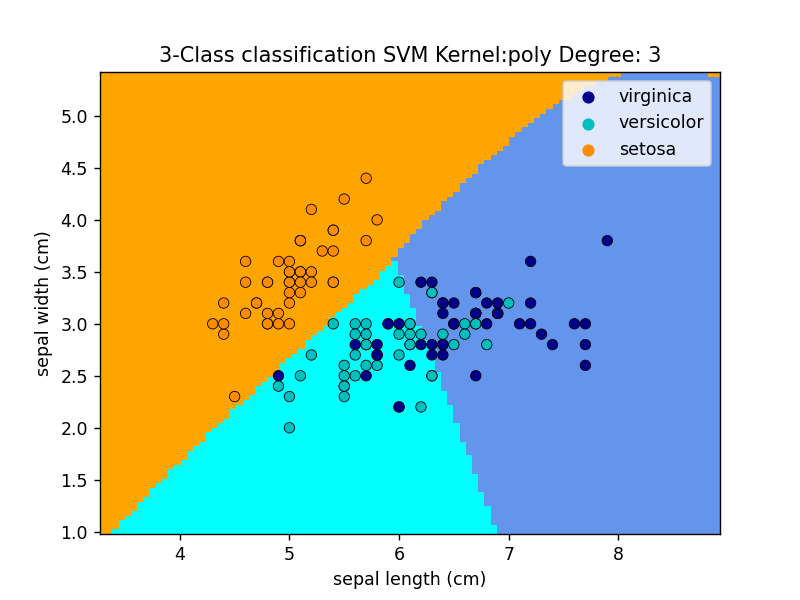

Text(0.5, 1.0, '3-Class classification SVM Kernel:poly Degree: 3')

In [43]:
kernel = 'poly'
degree = 3
svc2 = svm.SVC(kernel=kernel, degree=degree)
svc2.fit(iris_X_train[:, :2], iris_y_train)
plot_decision_boundaries(svc2, iris_X_train, iris_y_train)
plt.title(f"3-Class classification SVM Kernel:{kernel} Degree: {degree}")

In [42]:
print(f'Predicted array: {svc2.predict(iris_X_test[:, :2])}')
print(f'Test array: {iris_y_test}')

Predicted array: [1 1 1 0 0 0 2 1 2 0]
Test array: [1 1 1 0 0 0 2 1 2 0]


### K-Nearest Neighbors

### Question 6
Redo questions 4 and 5 to fit a KNN model. <br>
This time change the neighbors parameter to see how that affects the decision boundary.

In [63]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 20
knn = KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(iris_X_train[:, :2], iris_y_train)

KNeighborsClassifier(n_neighbors=20)

<IPython.core.display.Javascript object>


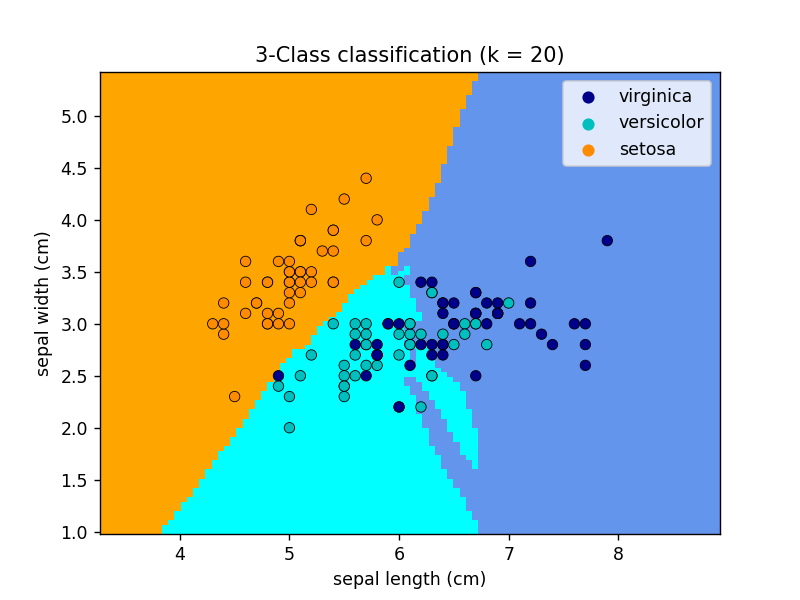

Text(0.5, 1.0, '3-Class classification (k = 20)')

In [64]:
plot_decision_boundaries(knn, iris_X_train, iris_y_train)
plt.title(
    "3-Class classification (k = %i)" % (n_neighbors)
)

In [65]:
print(f'Predicted array: {knn.predict(iris_X_test[:, :2])}')
print(f'Test array: {iris_y_test}')

Predicted array: [1 1 1 0 0 0 2 1 2 0]
Test array: [1 1 1 0 0 0 2 1 2 0]


### Naive Bayes Classifier

### Question 7
Redo questions 4 and 5 but for a gaussian naive bayes model. <br>

In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
gnb = model.fit(iris_X_train[:, :2], iris_y_train)

<IPython.core.display.Javascript object>


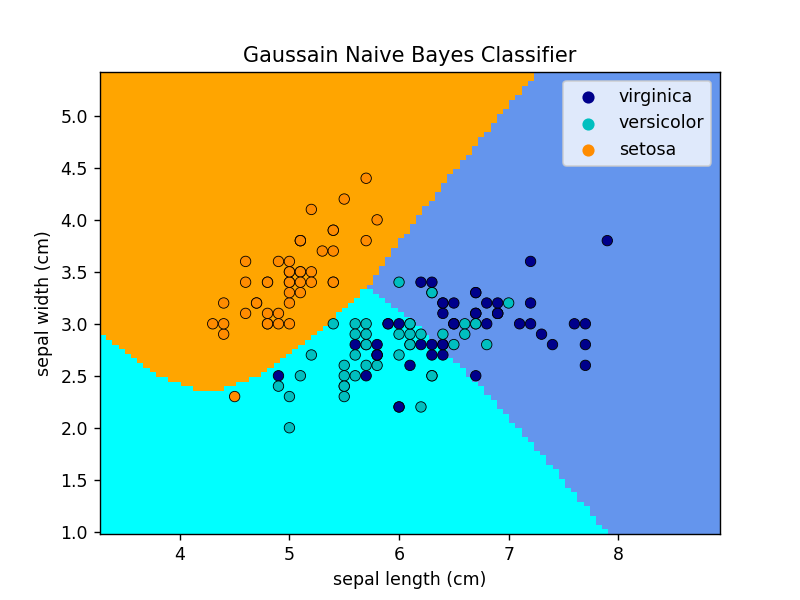

Text(0.5, 1.0, 'Gaussain Naive Bayes Classifier')

In [67]:
plot_decision_boundaries(gnb, iris_X_train, iris_y_train)
plt.title("Gaussain Naive Bayes Classifier")

In [68]:
print(f'Predicted array: {gnb.predict(iris_X_test[:, :2])}')
print(f'Test array: {iris_y_test}')

Predicted array: [1 1 1 0 0 0 2 1 2 0]
Test array: [1 1 1 0 0 0 2 1 2 0]


### Decision Trees

### Question 8
Redo questions 4 and 5 but for a decision tree model. <br>
Use all the features this time, and create a graph that shows the decision tree.

In [19]:
from sklearn import tree
dectree = tree.DecisionTreeClassifier()
dectree.fit(iris_X_train, iris_y_train)

DecisionTreeClassifier()

In [20]:
dot_data = tree.export_graphviz(dectree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

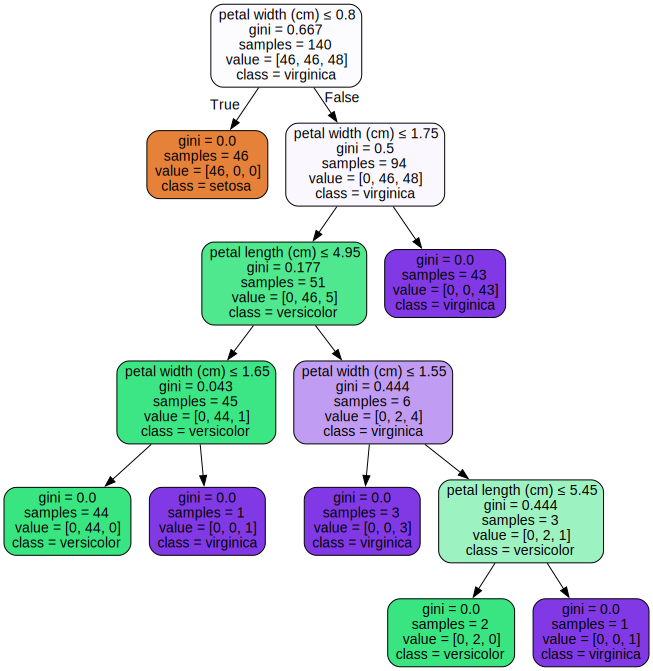

In [21]:
dot_data = tree.export_graphviz(dectree, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

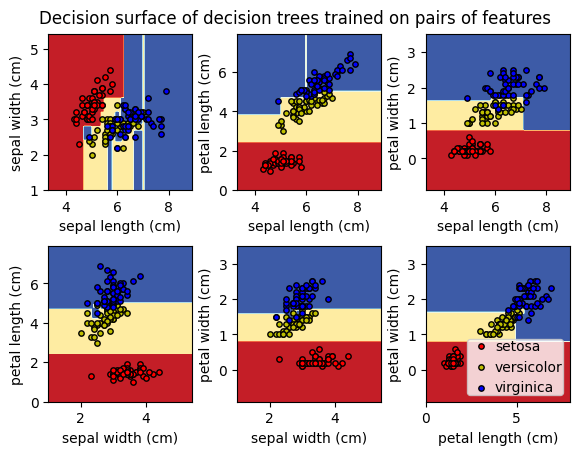

In [21]:
# Parameters
n_classes = len(iris.target_names)
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Plot the decision boundary
    X = iris_X_train[:, pair]

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, iris_y_train)
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(iris_y_train == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [22]:
print(f'Predicted array: {dectree.predict(iris_X_test)}')
print(f'Test array: {iris_y_test}')

Predicted array: [1 2 1 0 0 0 2 1 2 0]
Test array: [1 1 1 0 0 0 2 1 2 0]
